In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
!pip install geopandas
!pip install contextily

In [ ]:
import geopandas
import pandas as pd
import contextily
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
bike_area = geopandas.read_file("/content/drive/MyDrive/bike_area_sosta/bike_areesosta.zip")
bike_area

,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry
0,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991)
1,4,1545,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (9.16829 45.51697)
2,8,6330,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.08480 45.47628)
3,9,7165,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.15673 45.48228)
4,10,6660,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (9.12054 45.45506)
...,...,...,...,...,...,...,...,...,...,...,...,...
1517,3232,1242,72,9,Esistente,Velocipedi,3,4,12,Triangolare,Cortile o altro spazio collegato al civico,POINT (9.16586 45.50530)
1518,3233,1242,72,9,Esistente,Velocipedi,5,2,10,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16628 45.50584)
1519,3234,1242,72,9,Esistente,Velocipedi,6,2,12,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16634 45.50568)
1520,3235,1242,72,9,Esistente,Velocipedi,29,2,58,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16633 45.50532)


In [ ]:
stradario = pd.read_csv("/content/drive/MyDrive/stradario/stradario.csv")
stradario.head()

,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO
0,4377,VIA,8 OTTOBRE 2001,12,NaN,138,916,4
1,3123,VIA,A.DEL SARTO,1,NaN,129,665,3
2,3123,VIA,A.DEL SARTO,3,NaN,129,665,3
3,3123,VIA,A.DEL SARTO,4,NaN,129,665,3
4,3123,VIA,A.DEL SARTO,5,NaN,129,665,3


1) una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette

In [ ]:
bike_area['id_via'] = pd.to_numeric(bike_area['id_via'])
stradario['CODICE_VIA'] = pd.to_numeric(stradario['CODICE_VIA'])

In [ ]:
stradario_sd = stradario.drop_duplicates(subset = ["CODICE_VIA"])
stradario_sd

,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO
0,4377,VIA,8 OTTOBRE 2001,12,NaN,138,916,4
1,3123,VIA,A.DEL SARTO,1,NaN,129,665,3
27,3135,VIA,ABAMONTI GIUSEPPE,1,NaN,129,113,3
30,2558,VIA,ABANO,3,NaN,131,1565,3
41,1295,VIA,ABBA GIUSEPPE C,4,NaN,158,1184,9
...,...,...,...,...,...,...,...,...
51220,5390,VIA,ZUCCARO,2,NaN,146,1028,6
51226,1254,VIA,ZUCCOLI LUCIANO,6,NaN,125,1608,2
51235,5302,VIA,ZUMBINI BONAVENTURA,6,NaN,143,1008,6
51251,1216,VIA,ZURETTI G.,1,NaN,125,1605,2


In [ ]:
Straike = pd.merge(bike_area, stradario_sd, how = "left", left_on = ['id_via'], right_on = ['CODICE_VIA'])
Straike

,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO
0,2,5339.0,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339.0,PZA,ABBIATEGRASSO,1.0,NaN,142.0,2066.0,5.0
1,4,1545.0,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (9.16829 45.51697),1545.0,VLE,AFFORI,1.0,NaN,161.0,1216.0,9.0
2,8,6330.0,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.08480 45.47628),6330.0,VIA,AIRAGHI GAETANO,3.0,NaN,153.0,2117.0,7.0
3,9,7165.0,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.15673 45.48228),7165.0,VIA,ALCUINO,1.0,NaN,149.0,444.0,8.0
4,10,6660.0,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (9.12054 45.45506),6660.0,VIA,ALLODOLA,5.0,NaN,147.0,1032.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,3232,1242.0,72,9,Esistente,Velocipedi,3,4,12,Triangolare,Cortile o altro spazio collegato al civico,POINT (9.16586 45.50530),1242.0,VIA,CANDIANI G.,5.0,NaN,158.0,1954.0,9.0
1518,3233,1242.0,72,9,Esistente,Velocipedi,5,2,10,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16628 45.50584),1242.0,VIA,CANDIANI G.,5.0,NaN,158.0,1954.0,9.0
1519,3234,1242.0,72,9,Esistente,Velocipedi,6,2,12,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16634 45.50568),1242.0,VIA,CANDIANI G.,5.0,NaN,158.0,1954.0,9.0
1520,3235,1242.0,72,9,Esistente,Velocipedi,29,2,58,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16633 45.50532),1242.0,VIA,CANDIANI G.,5.0,NaN,158.0,1954.0,9.0


In [ ]:
Straike[["DESCRIZIONE_VIA","CIVICO", "stalli_tot"]]

,DESCRIZIONE_VIA,CIVICO,stalli_tot
0,ABBIATEGRASSO,1.0,15
1,AFFORI,1.0,10
2,AIRAGHI GAETANO,3.0,5
3,ALCUINO,1.0,5
4,ALLODOLA,5.0,4
...,...,...,...
1517,CANDIANI G.,5.0,12
1518,CANDIANI G.,5.0,10
1519,CANDIANI G.,5.0,12
1520,CANDIANI G.,5.0,58


2) una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere

In [ ]:
milano = geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm (1).zip")
milano.head()

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."


In [ ]:
Straike_milano = geopandas.sjoin(Straike, milano, op = "within", how = "left")
Straike_milano.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO,index_right,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID
0,2,5339.0,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339.0,PZA,ABBIATEGRASSO,1.0,NaN,142.0,2066.0,5.0,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0
1,4,1545.0,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (9.16829 45.51697),1545.0,VLE,AFFORI,1.0,NaN,161.0,1216.0,9.0,69.0,80.0,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158.0
2,8,6330.0,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.08480 45.47628),6330.0,VIA,AIRAGHI GAETANO,3.0,NaN,153.0,2117.0,7.0,11.0,62.0,QUINTO ROMANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6962.785127,1.645797e+06,100.0
3,9,7165.0,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.15673 45.48228),7165.0,VIA,ALCUINO,1.0,NaN,149.0,444.0,8.0,2.0,67.0,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91.0
4,10,6660.0,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (9.12054 45.45506),6660.0,VIA,ALLODOLA,5.0,NaN,147.0,1032.0,6.0,87.0,53.0,LORENTEGGIO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8442.031660,2.644338e+06,176.0


In [ ]:
Straike_milano[["stalli_tot","DESCRIZIONE_VIA","CIVICO", "NIL"]]

,stalli_tot,DESCRIZIONE_VIA,CIVICO,NIL
0,15,ABBIATEGRASSO,1.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1,10,AFFORI,1.0,AFFORI
2,5,AIRAGHI GAETANO,3.0,QUINTO ROMANO
3,5,ALCUINO,1.0,PORTELLO
4,4,ALLODOLA,5.0,LORENTEGGIO
...,...,...,...,...
1517,12,CANDIANI G.,5.0,BOVISA
1518,10,CANDIANI G.,5.0,BOVISA
1519,12,CANDIANI G.,5.0,BOVISA
1520,58,CANDIANI G.,5.0,BOVISA


3) i nomi dei quartieri in cui non ci sono aree di sosta;

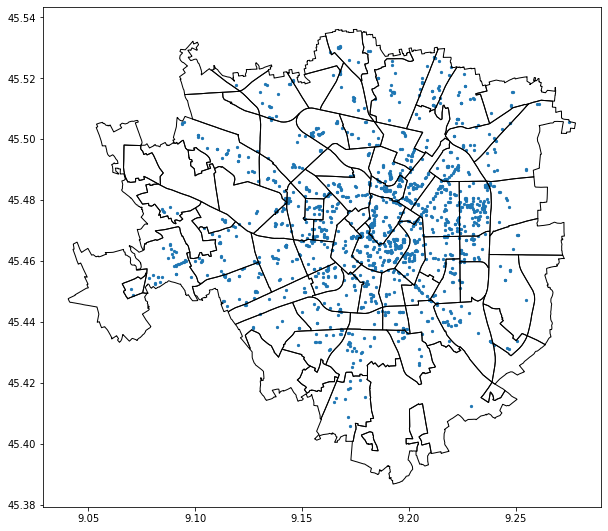

In [ ]:
ax = Straike_milano.plot(figsize = (10, 10), markersize = 5)
milano.plot(ax = ax, facecolor = "none", edgecolor = "k")

In [ ]:
Straike_milano["NIL"]

0       STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1                                                  AFFORI
2                                           QUINTO ROMANO
3                                                PORTELLO
4                                             LORENTEGGIO
                              ...                        
1517                                               BOVISA
1518                                               BOVISA
1519                                               BOVISA
1520                                               BOVISA
1521                                         SCALO ROMANA
Name: NIL, Length: 1522, dtype: object

In [ ]:
milano[~milano.NIL.isin(Straike_milano["NIL"])]

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
5,63,FIGINO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5622.522341,1.424660e+06,94,"POLYGON ((9.08375 45.48485, 9.08280 45.48521, ..."
22,75,STEPHENSON,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3582.570059,5.600844e+05,111,"POLYGON ((9.13009 45.50820, 9.13016 45.50784, ..."
23,47,CANTALUPA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5161.415348,9.266817e+05,112,"POLYGON ((9.16112 45.42589, 9.16270 45.42544, ..."
24,39,QUINTOSOLE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6740.830821,1.058525e+06,113,"POLYGON ((9.21047 45.39699, 9.21039 45.39698, ..."
28,88,PARCO BOSCO IN CITTA',05/02/2020,Vigente,Milano 2030 - PGT Approvato,37072.981211,7.834006e+06,117,"POLYGON ((9.07309 45.50604, 9.07326 45.50589, ..."
36,87,ASSIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,16203.755410,5.840942e+06,125,"POLYGON ((9.04687 45.46276, 9.04688 45.46276, ..."
46,40,RONCHETTO DELLE RANE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2223.117187,1.888634e+05,135,"POLYGON ((9.18364 45.40122, 9.18442 45.40004, ..."
48,31,MONLUE' - PONTE LAMBRO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9835.924371,2.629018e+06,137,"POLYGON ((9.27271 45.46079, 9.27276 45.46072, ..."
54,34,CHIARAVALLE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2927.691044,3.094942e+05,143,"POLYGON ((9.24507 45.41742, 9.24303 45.41508, ..."


4) una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta

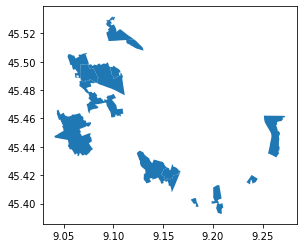

In [ ]:
milano[~milano.NIL.isin(Straike_milano["NIL"])].plot()

5) il nome del quartiere con più aree di sosta;

In [ ]:
Straike_groupby = Straike_milano.groupby("NIL").count()[["id_via"]].reset_index()
Straike_groupby

,NIL,id_via
0,ADRIANO,5
1,AFFORI,11
2,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,31
3,BANDE NERE,21
4,BARONA,14
...,...,...
71,TRIULZO SUPERIORE,1
72,UMBRIA - MOLISE - CALVAIRATE,16
73,VIGENTINO - Q.RE FATIMA,12
74,VILLAPIZZONE - CAGNOLA - BOLDINASCO,14


In [ ]:
max_aree = Straike_groupby[Straike_groupby.id_via == Straike_groupby.id_via.max()]
max_aree

,NIL,id_via
17,DUOMO,136


6) una mappa di Milano con l'indicazione del quartiere con più aree di sosta;

In [ ]:
milano_max = pd.merge(milano, max_aree, how = "inner", on = "NIL")
milano_max

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry,id_via
0,1,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101,"POLYGON ((9.19482 45.47201, 9.19495 45.47213, ...",136


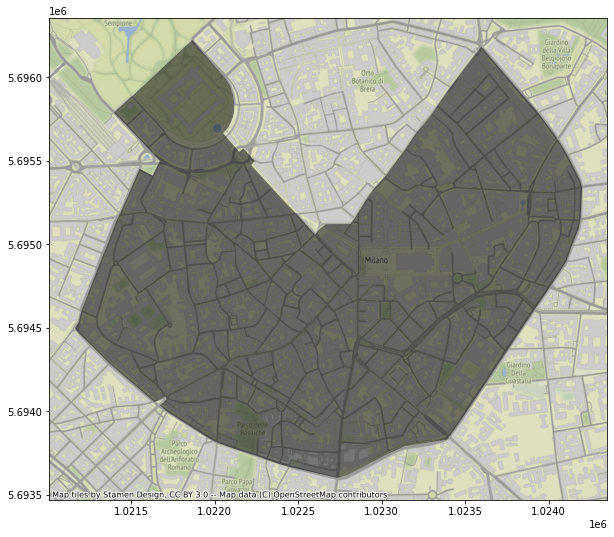

In [ ]:
ax = milano_max.to_crs(epsg =3857).plot(figsize = (10, 10), facecolor = "k", alpha = 0.5)
contextily.add_basemap(ax)

7) i nomi dei quartieri con un numero di aree di sosta minori della media;





In [ ]:
media_aree = Straike_groupby.id_via.mean()
media_aree

19.894736842105264

In [ ]:
min_q = Straike_groupby[Straike_groupby.id_via < media_aree]
min_q

,NIL,id_via
0,ADRIANO,5
1,AFFORI,11
4,BARONA,14
7,BOVISASCA,5
9,BRUZZANO,9
11,CIMIANO - ROTTOLE - Q.RE FELTRE,12
13,COMASINA,1
15,DE ANGELI - MONTE ROSA,19
16,DERGANO,12
18,FARINI,4


8) una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media;

In [ ]:
milano_min = pd.merge(milano, min_q, how = "inner", on = "NIL")
milano_min.head()

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry,id_via
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...",6
1,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...",18
2,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...",5
3,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...",3
4,76,QUARTO OGGIARO - VIALBA - MUSOCCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7138.355680,2.776872e+06,96,"POLYGON ((9.13481 45.52095, 9.13481 45.52094, ...",16


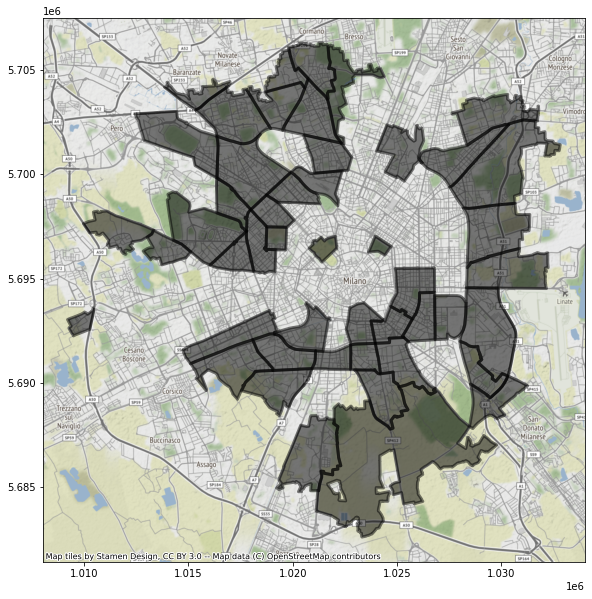

In [ ]:
ax = milano_min.to_crs(epsg =3857).plot(figsize = (10, 10), edgecolor = "k", facecolor = "k", alpha = 0.5, linewidth = 3)
contextily.add_basemap(ax)

9) una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi;

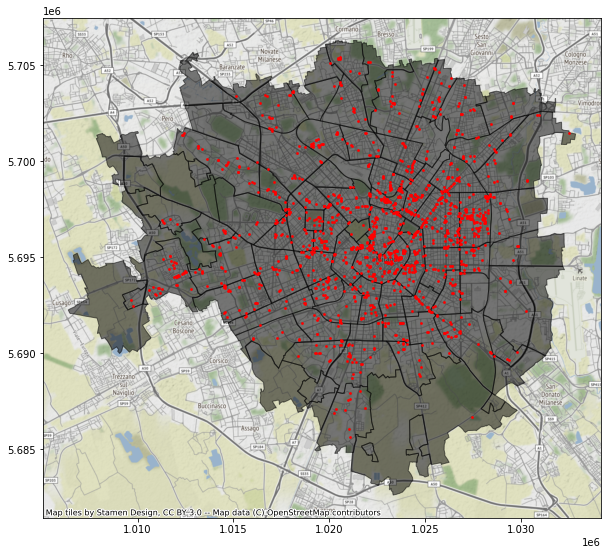

In [ ]:
ax = milano.to_crs(epsg =3857).plot(figsize = (10, 10), edgecolor = "k", facecolor = "k", alpha = 0.5)
Straike_milano.to_crs(epsg =3857).plot(color = "red", ax = ax, markersize = 3)
contextily.add_basemap(ax)

10) una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;


In [ ]:
Straike_milano.head()

,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO,index_right,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID
0,2,5339.0,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339.0,PZA,ABBIATEGRASSO,1.0,NaN,142.0,2066.0,5.0,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0
1,4,1545.0,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (9.16829 45.51697),1545.0,VLE,AFFORI,1.0,NaN,161.0,1216.0,9.0,69.0,80.0,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158.0
2,8,6330.0,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.08480 45.47628),6330.0,VIA,AIRAGHI GAETANO,3.0,NaN,153.0,2117.0,7.0,11.0,62.0,QUINTO ROMANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6962.785127,1.645797e+06,100.0
3,9,7165.0,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.15673 45.48228),7165.0,VIA,ALCUINO,1.0,NaN,149.0,444.0,8.0,2.0,67.0,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91.0
4,10,6660.0,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (9.12054 45.45506),6660.0,VIA,ALLODOLA,5.0,NaN,147.0,1032.0,6.0,87.0,53.0,LORENTEGGIO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8442.031660,2.644338e+06,176.0


In [ ]:
Straike_milano_fin = Straike_milano.groupby('NIL').count().reset_index()
Straike_milano_fin

,NIL,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO,index_right,ID_NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID
0,ADRIANO,5,5,3,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5
1,AFFORI,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0,11,11,11,11,11,11,11,11,11,11,11
2,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,31,31,30,31,31,31,31,31,31,31,31,31,30,30,30,30,0,30,30,30,31,31,31,31,31,31,31,31
3,BANDE NERE,21,21,13,21,21,21,21,21,21,21,21,21,21,21,21,21,6,21,21,21,21,21,21,21,21,21,21,21
4,BARONA,14,14,12,14,14,14,14,14,14,14,14,14,12,12,12,12,0,12,12,12,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,TRIULZO SUPERIORE,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
72,UMBRIA - MOLISE - CALVAIRATE,16,16,11,16,16,16,16,16,16,16,16,16,16,16,16,16,0,16,16,16,16,16,16,16,16,16,16,16
73,VIGENTINO - Q.RE FATIMA,12,12,10,12,12,12,12,12,12,12,12,12,12,12,12,12,0,12,12,12,12,12,12,12,12,12,12,12
74,VILLAPIZZONE - CAGNOLA - BOLDINASCO,14,14,12,14,14,14,14,14,14,14,14,14,14,14,14,14,0,14,14,14,14,14,14,14,14,14,14,14


In [ ]:
Straike_milano_fin2 = pd.merge(Straike_milano_fin, milano,  how = "left", on = ['NIL'])
Straike_milano_fin2

In [ ]:
Straike_milano_fin2.rename(columns = {'geometry_y':'geometry'}, inplace = True)

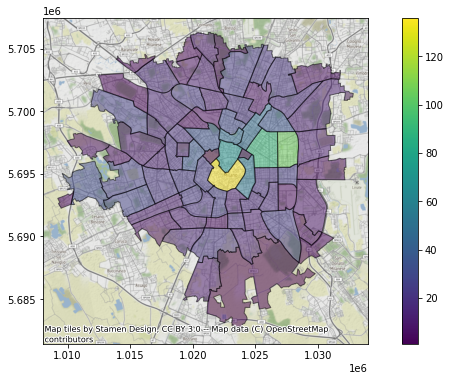

In [ ]:
ax = Straike_milano_fin2.to_crs(epsg = 3857).plot(figsize = (12 , 6), column = "id_via", legend=True, alpha = 0.5, edgecolor = "k")
contextily.add_basemap(ax)

11) data una via (inserita dall'utente), avere le aree di sosta di quella via

In [ ]:
via = input("Inserisci una via: ")

if via in list(Straike_milano_fin.DESCRIZIONE_VIA):
  print(Straike_milano_fin[Straike_milano_fin["DESCRIZIONE_VIA"] == via])
else:
  print("La via da te inserita non è presente all'interno del geodataframe")

12) dato un quartiere (inserito dall'utente), avere la mappa di quel quartiere con l'indicazione della posizione delle aree di sosta

In [ ]:
quartiere_input = input("Inserisci il nome di un quartiere: ")

if quartiere_input in list(milano.NIL):

  quartiere= milano[milano["NIL"] == quartiere_input]

  bike_area_quartiere = bike_area[bike_area.intersects(quartiere.unary_union)]
  bike_area_quartiere

  ax = quartiere.to_crs(epsg=3857).plot(figsize=(15,15), alpha= 0.5, edgecolor= "k", linewidth= 3)
  bike_area_quartiere.to_crs(epsg=3857).plot(ax=ax, color= "r")
  contextily.add_basemap(ax)
else:
  print("Il quartiere da te inserito non è presente all'inetrnmo del geodataframe")

13) date le coordinate geografiche di un punto (inserite dall'utente), avere una mappa che visualizzi le aree di sosta a meno di 500 m da quel punto;

In [ ]:
from shapely.geometry import Point

longitudine = float(input("Inserisci la longitudine: "))
latitudine = float(input("Inserisci la latitudine: "))
#9.191383, 45.464211 (coordinate del duomo)

punto = Point(longitudine, latitudine)
punto

buffer_punto = punto.buffer(0.0044) # 500 gradi in metri sono 0.0044 metri
aree_sosta_meno500 =  bike_area[bike_area.within(buffer_punto)]

ax = aree_sosta_meno500.to_crs(epsg=3857).plot(figsize=(15,15), color= "r")
contextily.add_basemap(ax)
